<a href="https://colab.research.google.com/github/o-going/pdm01/blob/master/py-tensorflow/tf2_7_fmnist_CNN_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of fmnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

***
- ## Traget: Find the best model
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

## dataset: fashion_mnist
- (60000, 28, 28), train
- (10000, 28, 28), test
- grayscale images of items of 10 types of clothings, such as shoes, t-shirts, dresses, and more.
- class names
> class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

- DL of fmnist
> https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/


## Search the best model of C2F2
- callback
    - Early stopping
    - model checkpoint

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.3.0


In [2]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [3]:
from keras.datasets import fashion_mnist

(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

4423680/4422102 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [4]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [5]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((60000,), (60000, 10))

### Display fashions
- one random fashion
- 10 representative fashions

6144


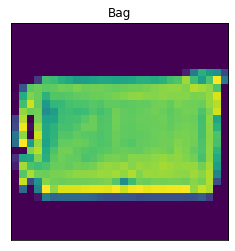

In [6]:
# Code here!
# display one random image from the training set:
class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

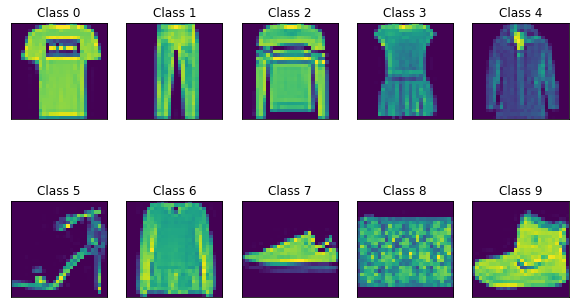

In [7]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    # print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

#### **import Conv2D, MaxPool2D**

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10)

In [32]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
c1f2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
________________________________________________

In [34]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4266 - accuracy: 0.8502
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2872 - accuracy: 0.8960
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2470 - accuracy: 0.9097
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2197 - accuracy: 0.9179
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1995 - accuracy: 0.9257
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1803 - accuracy: 0.9332
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1653 - accuracy: 0.9380
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1499 - accuracy: 0.9434
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1379 - accuracy: 0.9478
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.126

In [35]:
c1f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3655 - accuracy: 0.9166


[0.3654865622520447, 0.9165999889373779]

## **CNN1 + FCN3**

In [36]:
c1f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),  
    Dropout(0.25),
    Dense(128, activation='relu'),  
    Dropout(0.25),  
    keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
c1f3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [39]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4397 - accuracy: 0.8435
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2924 - accuracy: 0.8939
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2483 - accuracy: 0.9096
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2152 - accuracy: 0.9212
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1932 - accuracy: 0.9288
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1714 - accuracy: 0.9370
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1523 - accuracy: 0.9436
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1382 - accuracy: 0.9487
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1238 - accuracy: 0.9542
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.113

In [40]:
c1f3.evaluate(X_test, y_test, batch_size= 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.4056 - accuracy: 0.9204


[0.4055873155593872, 0.9204000234603882]

## **CNN2 + FCN2**

In [41]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [42]:
c2f2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [45]:
c2f2.fit(X_train,y_train, epochs= 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0376 - accuracy: 0.9864
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0350 - accuracy: 0.9875
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0334 - accuracy: 0.9881
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9888
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0317 - accuracy: 0.9881
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0356 - accuracy: 0.9875
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9877
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9889
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0302 - accuracy: 0.9890
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.032

In [46]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.6409 - accuracy: 0.9220


[0.6408751010894775, 0.921999990940094]

## **CNN2 + FCN3**

In [47]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [48]:
c2f3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [49]:
c2f3.fit(X_train, y_train, epochs=20, batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5054 - accuracy: 0.8191
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3140 - accuracy: 0.8888
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2630 - accuracy: 0.9050
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2323 - accuracy: 0.9161
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2086 - accuracy: 0.9245
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1915 - accuracy: 0.9299
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1748 - accuracy: 0.9366
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1604 - accuracy: 0.9404
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1475 - accuracy: 0.9463
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.137

In [50]:
 c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3236 - accuracy: 0.9223


[0.3236021101474762, 0.9222999811172485]

# **[DIY] Hidden layer에 따른 정확도**

In [51]:
c1f2_score = c1f2.evaluate(X_test, y_test, batch_size = 32)
c1f3_score = c1f3.evaluate(X_test, y_test, batch_size = 32)
c2f2_score = c2f2.evaluate(X_test, y_test, batch_size = 32)
c2f3_score = c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 3ms/step - loss: 0.3236 - accuracy: 0.9223


In [52]:
accuracy = [c1f2_score[1],c1f3_score[1],c2f2_score[1],c2f3_score[1]]
accuracy

[0.9165999889373779, 0.9204000234603882, 0.921999990940094, 0.9222999811172485]

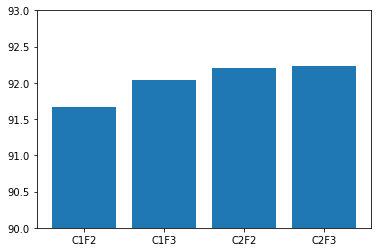

In [58]:
x = np.arange(4)
cnms = ['C1F2','C1F3','C2F2','C2F3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnms)
plt.ylim((90,93))
plt.show()

In [60]:
c2f2.save('fmnist_cnn_best.hdf5')

In [61]:
from keras.models import load_model

model = load_model('fmnist_cnn_best.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.6409 - accuracy: 0.9220


[0.6408751010894775, 0.921999990940094]

## **C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.**

In [62]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0295 - accuracy: 0.9898 - val_loss: 0.6428 - val_accuracy: 0.9190
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0250 - accuracy: 0.9913 - val_loss: 0.6856 - val_accuracy: 0.9198
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.6607 - val_accuracy: 0.9182
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9901 - val_loss: 0.6128 - val_accuracy: 0.9218
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0255 - accuracy: 0.9915 - val_loss: 0.6847 - val_accuracy: 0.9197
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278 - accuracy: 0.9903 - val_loss: 0.6376 - val_accuracy: 0.9198
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.6798 - val_accuracy:

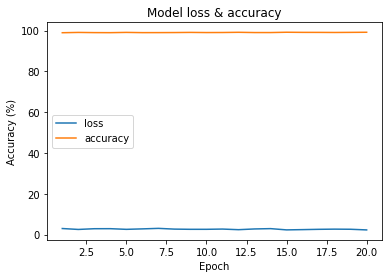

In [63]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [64]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

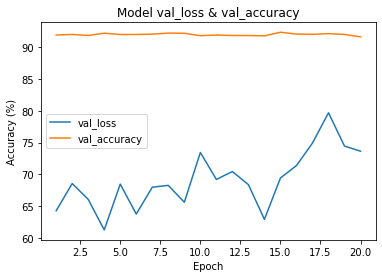

In [65]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

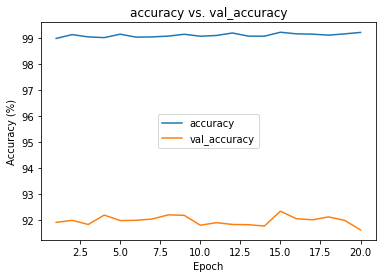

In [67]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

## **Search the best model of C2F2**

In [68]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [69]:
c2f2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [71]:
cp_callback = callbacks.ModelCheckpoint(filepath="./mnist_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=20)    # patience=10, 20, 50

In [72]:
# Train CNN model
# Find and save the best model.
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4443 - accuracy: 0.8394 - val_loss: 0.3225 - val_accuracy: 0.8816
Epoch 2/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2936 - accuracy: 0.8934 - val_loss: 0.2735 - val_accuracy: 0.8988
Epoch 3/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2492 - accuracy: 0.9088 - val_loss: 0.2574 - val_accuracy: 0.9092
Epoch 4/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2178 - accuracy: 0.9199 - val_loss: 0.2316 - val_accuracy: 0.9161
Epoch 5/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1916 - accuracy: 0.9289 - val_loss: 0.2400 - val_accuracy: 0.9138
Epoch 6/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1736 - accuracy: 0.9364 - val_loss: 0.2317 - val_accuracy: 0.9205
Epoch 7/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1551 - accuracy: 0.9423 - val_loss: 0.2464 - val_ac

In [73]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.5125 - accuracy: 0.9227


[0.5125004053115845, 0.9226999878883362]

## **Graph of loss and accuracy**
- model: C2F2

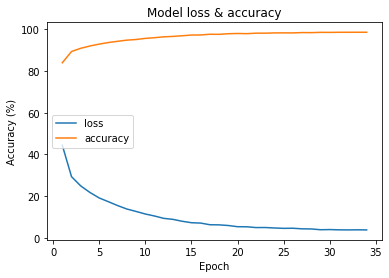

In [74]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 34
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [75]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

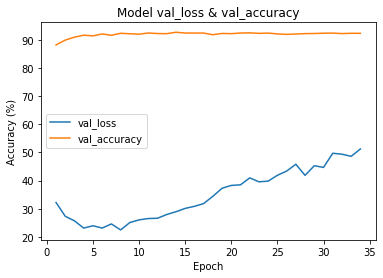

In [76]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

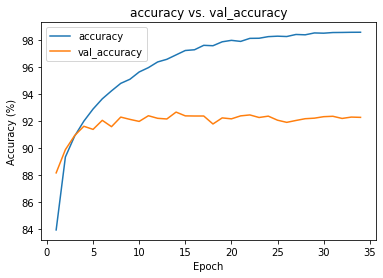

In [77]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy']) #, loc='center bottom')

### **최적화된 모형 불러와서 이용**

- callbacks.ModelCheckpoint를 이용해서 트레이닝 중 val_accuacy가 가장 높은 모형을 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

> fmnist_c2f2_best_weights.029-0.9255.hdf5

In [ ]:
# c2f2.save('fmnist_cnn_best.hdf5')

In [78]:
from keras.models import load_model

model = load_model('fmnist_c2f2_best_weights.029-0.9255.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.4963 - accuracy: 0.9255


[0.4963095188140869, 0.9254999756813049]

## Confusion matrix

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [80]:
predictions = model.predict(X_test)

In [81]:
predictions.shape

(10000, 10)

In [82]:
predictions0 = np.argmax(predictions, axis=1)
predictions0.shape

(10000,)

In [83]:
cm = confusion_matrix(y_test0, predictions0)

In [84]:
class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

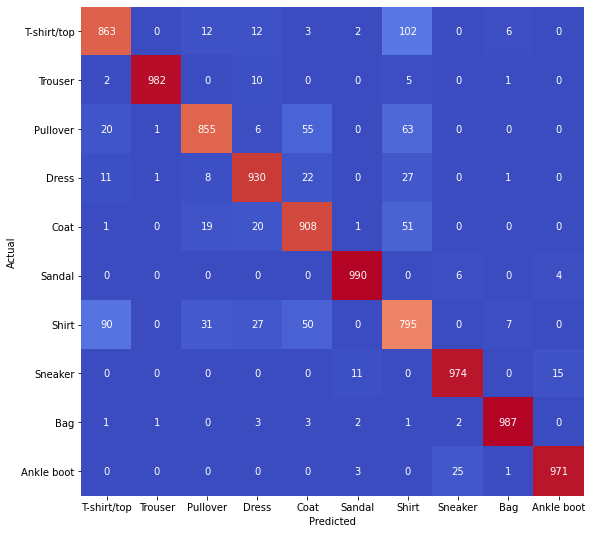

In [85]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()